In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Spotify Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [3]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [4]:
#Convert 'WeekID' to DateTime Object & Check First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [5]:
#Merge BB100 with Spotify Features
bb100_features = pd.merge(bb100, features, on='SongID', how='left')
bb100_features.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
11977,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,89,Blue Boy,Jim Reeves,Blue BoyJim Reeves,1,NaN,89,1,Jim Reeves,Blue Boy,"['adult standards', 'nashville sound', 'rock-and-roll']",05k40oRJ58mQBJSAz0FkLI,https://p.scdn.co/mp3-preview/80d3e13c406f8251e5bee84366353b09f630dfff?cid=b8d3901151d34489a160e3cf0ab1fa94,129333.0,0.0,The Essential Jim Reeves,0.613,0.372,0.0,-13.051,1.0,0.0299,0.7850,0.00154,0.115,0.697,98.549,4.0,24.0
1014,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,6,Rebel-'rouser,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouserDuane Eddy His Twangy Guitar And The Rebels,1,NaN,6,1,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263155,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,70,Quicksand,Morray,QuicksandMorray,1,66.0,65,15,Morray,Quicksand,[],4iCZ6Cr76For1TuHUQ90r8,https://p.scdn.co/mp3-preview/5145f491144ef1468d624cfc0203c2d22ba896dc?cid=b8d3901151d34489a160e3cf0ab1fa94,224933.0,1.0,"{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/44vREmJC0OlVZjZaGLqVEd'}, 'href': 'https://api.spotify.com/v1/artists/44vREmJC0OlVZjZaGLqVEd', 'i...",0.901,0.656,4.0,-7.452,0.0,0.2770,0.0807,0.00000,0.181,0.599,119.956,4.0,71.0
7816,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,28,hunger.on.hillside,J. Cole & Bas,hunger.on.hillsideJ. Cole & Bas,1,NaN,28,1,J. Cole & Bas,hunger.on.hillside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_genre = bb100_features[['WeekID', 'SongID', 'spotify_genre']]
df_genre.isnull().sum()

WeekID               0
SongID               0
spotify_genre    14586
dtype: int64

In [7]:
len(df_genre)

330461

In [8]:
df_genre['spotify_genre'].replace({"[]":np.nan}, inplace=True)
df_genre.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


WeekID               0
SongID               0
spotify_genre    37651
dtype: int64

In [9]:
df_genre.dropna(subset=['spotify_genre'], inplace=True)
df_genre.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


WeekID           0
SongID           0
spotify_genre    0
dtype: int64

In [10]:
len(df_genre)

292810

In [11]:
#Noticing that Spotify_Genre Values is an Array
arr = df_genre['spotify_genre'].values

In [12]:
#Important Conversion to list of genres for items in Array
out = [i.replace('\'', '').replace('[','').replace(']','').replace('"','').split(", ") for i in arr]

In [13]:
#Apply "Explode" on new Dataframe with Key Inputs: 
Genres_Explode = pd.DataFrame({'SongID':df_genre.SongID, 'WeekID':df_genre['WeekID'], 'Genres':out}).explode('Genres')

In [14]:
Genres_Explode

,SongID,WeekID,Genres
0,Don't Just Stand TherePatty Duke,1965-07-17,deep adult standards
1,Don't Just Stand TherePatty Duke,1965-07-24,deep adult standards
2,Don't Just Stand TherePatty Duke,1965-07-31,deep adult standards
3,Don't Just Stand TherePatty Duke,1965-08-07,deep adult standards
4,Don't Just Stand TherePatty Duke,1965-08-14,deep adult standards
...,...,...,...
330459,Here I Am Come & Take MeAl Green,1973-09-29,memphis soul
330459,Here I Am Come & Take MeAl Green,1973-09-29,quiet storm
330459,Here I Am Come & Take MeAl Green,1973-09-29,soul
330459,Here I Am Come & Take MeAl Green,1973-09-29,soul blues


In [15]:
Genres_Explode['Year'] = Genres_Explode.WeekID.dt.year

In [16]:
Genres_Explode

,SongID,WeekID,Genres,Year
0,Don't Just Stand TherePatty Duke,1965-07-17,deep adult standards,1965
1,Don't Just Stand TherePatty Duke,1965-07-24,deep adult standards,1965
2,Don't Just Stand TherePatty Duke,1965-07-31,deep adult standards,1965
3,Don't Just Stand TherePatty Duke,1965-08-07,deep adult standards,1965
4,Don't Just Stand TherePatty Duke,1965-08-14,deep adult standards,1965
...,...,...,...,...
330459,Here I Am Come & Take MeAl Green,1973-09-29,memphis soul,1973
330459,Here I Am Come & Take MeAl Green,1973-09-29,quiet storm,1973
330459,Here I Am Come & Take MeAl Green,1973-09-29,soul,1973
330459,Here I Am Come & Take MeAl Green,1973-09-29,soul blues,1973


In [17]:
hiphop = Genres_Explode[Genres_Explode.Genres=='hip hop']
hiphop = hiphop[['Year','Genres']]
hiphop

,Year,Genres
150,1996,hip hop
159,2000,hip hop
160,2001,hip hop
168,2003,hip hop
172,2004,hip hop
...,...,...
330381,2003,hip hop
330406,2019,hip hop
330417,1994,hip hop
330422,2002,hip hop


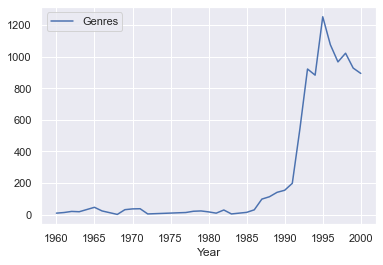

In [18]:
hiphop.groupby('Year').count()[:-21].plot();

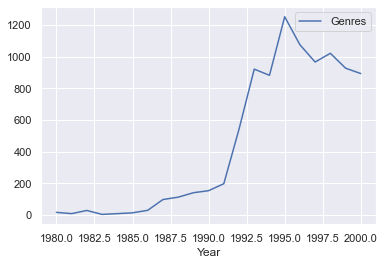

In [19]:
hiphop.groupby('Year').count()[15:-21].plot();